# Case Background & Key Questions	

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of his years’ survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1)  How does health status, represented by average number of days with bad physical health in the past month (PHYSHLTH), differ by state? Also provide an indication of distribution using whatever statistics you find suitable.
 												 								
2)  Digging deeper into the data, what are some factors that impact health (i.e. demographics, behaviors, previous illness, etc.)?	
						 						
To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_studey.csv`. Below you will find a list of steps/questions that you will need to take in your investigation. The first part of the notebook will be focused on cleaning up your data and vidualizing it.  The second part of the data set will be focused on performing statistical tests to make statements with statistical significance.  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# pd.read_csv('case_study.csv')

In [3]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=0)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [186]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,chronically_sick,Smokers
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0,0,3
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0,0,3
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0,0,3
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,0,3
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0,0,3


In [185]:
# Quickly check to see the size of our DF, both rows and columns
df.shape

(34545, 360)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [5]:
# your code here
#already in this format

Now check to see how large our subset df.

In [187]:
# your code here

df['_STATE'].unique()

array([ 9., 34., 36.])

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code.

In [188]:
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [8]:
#your code here

zero_dict = {88:0, 77: np.nan, 99:np.nan}

df['PHYSHLTH']= df['PHYSHLTH'].replace(zero_dict)



In [189]:
df.shape

(34545, 360)

## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a graph shows the distribution of the data.

In [10]:
# descriptive statistics

df['PHYSHLTH'].describe()


count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

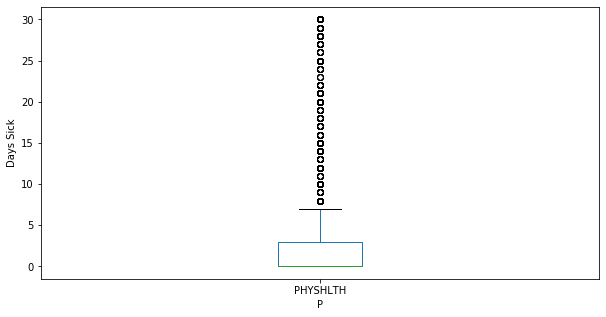

In [11]:
fig_1=df.boxplot(['PHYSHLTH'],figsize=(10,5),grid=False)

fig_1.set_ylabel('Days Sick', fontsize=10)
fig_1.set_xlabel('P')

fig_1.set_title('')


plt.show()

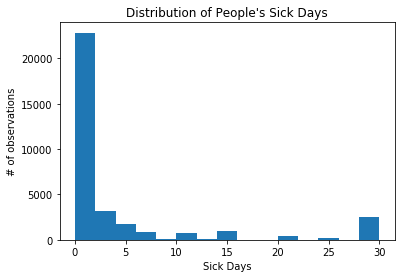

In [12]:
# graphic the distribution of data

fig_2=df.hist(['PHYSHLTH'],grid=False, bins=15)

fig_2[0,0].set_title("Distribution of People's Sick Days")
fig_2[0,0].set_ylabel('# of observations')
fig_2[0,0].set_xlabel('Sick Days')




plt.show()

## 3. Generate a graphic that compares the average number of sick days for each state. 

In [13]:
# code to calculate the average number of sick days by state

avg_sickdays_by_state = df.groupby('_STATE')['PHYSHLTH'].mean()

avg_sickdays_by_state

_STATE
9.0     3.688562
34.0    4.380957
36.0    4.148030
Name: PHYSHLTH, dtype: float64

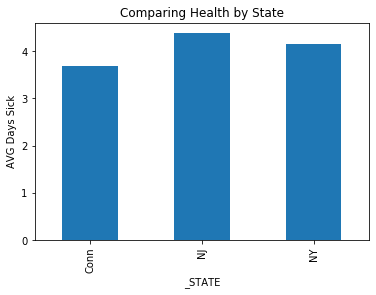

In [14]:
# code to graph those averages using matplotlib

fig_3=avg_sickdays_by_state.plot(kind='bar')

fig_3.set_ylabel('AVG Days Sick')
fig_3.set_title('Comparing Health by State')
fig_3.set_xticklabels(['Conn','NJ','NY'], fontsize=10)


plt.show()

In [15]:
df.groupby('_STATE')['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
_STATE,,,,,,,,
9.0,10413.0,3.688562,8.103732,0.0,0.0,0.0,2.0,30.0
34.0,11458.0,4.380957,8.923776,0.0,0.0,0.0,3.0,30.0
36.0,11876.0,4.148030,8.445330,0.0,0.0,0.0,3.0,30.0


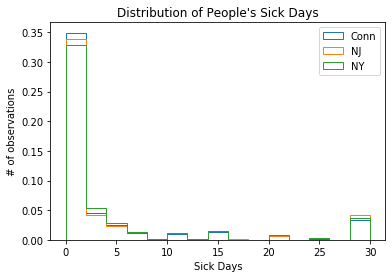

In [16]:
# graphic showing the histogram of data

df.groupby('_STATE')['PHYSHLTH'].plot(kind='hist',histtype='step',density=True,bins=15)

plt.legend(labels=['Conn','NJ','NY'])
plt.title("Distribution of People's Sick Days")
plt.ylabel('# of observations')
plt.xlabel('Sick Days')

plt.show()


## 4. Turn the number of sick days into a classification of of chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



In [17]:
# code to create new colum for chronically sick #greater than 10 days a month or pick your own
#use np.where to give everyone above 10 a 1 or below 0, answers used 10

df['chronically_sick'] = np.where(df['PHYSHLTH'] >= 15, 1,0)

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [18]:
# code to calculate averages per state

avg_chron_sick = df.groupby('_STATE')['chronically_sick'].mean()

avg_chron_sick

_STATE
9.0     0.101719
34.0    0.124616
36.0    0.112417
Name: chronically_sick, dtype: float64

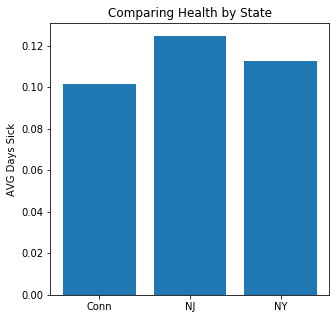

In [19]:
# create graphic to compare chronically sick by state

plt.figure(figsize=(5,5))
plt.bar(['Conn','NJ','NY'], avg_chron_sick)
plt.title('Comparing Health by State')
plt.ylabel('AVG Days Sick')
plt.show()

#pandas didn't work, avg_chron_sick.plot.bar()

## 6. Independent Variables (categorical)

Does smoking affect the number of days people feel physically ill? 
Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`. When cleaning this data you will find that many respondents were not asked that question. read the codebook to understand why, and use that information when cleaning up your data. I.E, you will need to process two columns in order to create a new column of smokers.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [86]:
# your code here #complex mapping #np.where(smok100 =x, smok100, smokday2)
#is the correct?


conditions=[df['SMOKDAY2']==1,df['SMOKDAY2']==2,df['SMOKDAY2']==3,
            df['SMOKDAY2']==7,df['SMOKDAY2']==9]
choices=[1,2,3,7,9]

df['Smokers']=np.select(conditions,choices,default=3)

In [87]:
df['SMOKDAY2'].value_counts()

3.0    9703
1.0    2676
2.0    1371
9.0      27
7.0       6
Name: SMOKDAY2, dtype: int64

In [106]:
df['Smokers'].value_counts(normalize=True) #percentage

3    0.881893
1    0.077464
2    0.039687
9    0.000782
7    0.000174
Name: Smokers, dtype: float64

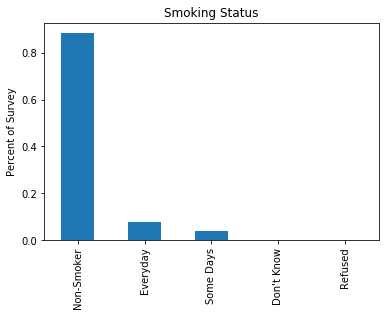

In [111]:
# code to graph those proportion of differen smoking groups using matplotlib

#plt.bar(height)

#plt.show()

Smokers = df['Smokers'].value_counts(normalize=True).plot.bar()
Smokers.set_xticklabels(['Non-Smoker','Everyday','Some Days', 'Don\'t Know', 'Refused'], fontsize=10)
Smokers.set_title('Smoking Status')
Smokers.set_ylabel('Percent of Survey')
plt.show()

In [170]:
smokers_breakdown_state_percent = df.groupby('_STATE')['Smokers'].value_counts(normalize=True)* 100
smoking_groups=smokers_breakdown_state_percent.unstack()

smokers_breakdown_state_percent

_STATE  Smokers
9.0     3          89.875331
        1           6.734039
        2           3.315074
        9           0.056668
        7           0.018889
34.0    3          87.914247
        1           7.917663
        2           4.133926
        9           0.025624
        7           0.008541
36.0    3          86.994857
        1           8.457833
        2           4.375867
        9           0.146951
        7           0.024492
Name: Smokers, dtype: float64

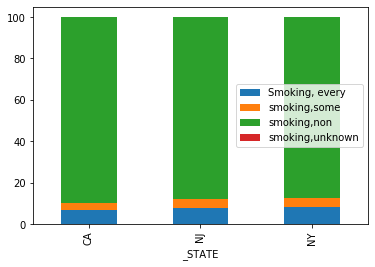

In [171]:
#why is my order different than the example 

smoking_groups_state = smoking_groups.plot(kind='bar', stacked =True)
smoking_groups_state.set_xticklabels(['CA','NJ','NY'])
plt.legend(['Smoking, every','smoking,some','smoking,non','smoking,unknown'])
plt.show()

In [128]:
# code to graph these averages sick days for each category of smoking status

avg_smoker_sickdays = df.groupby('Smokers')['PHYSHLTH'].mean()

avg_smoker_sickdays[0:4]

Smokers
1    6.653007
2    6.295659
3    3.759614
7    2.500000
Name: PHYSHLTH, dtype: float64

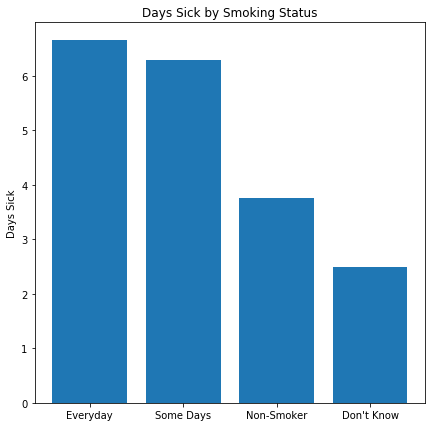

In [129]:
plt.figure(figsize=(7,7))
plt.bar(['Everyday','Some Days','Non-Smoker',"Don't Know"], avg_smoker_sickdays[0:4])
plt.title('Days Sick by Smoking Status')
plt.ylabel('Days Sick')
plt.show()

#this looks different than example? 

## 7. Independent Variables (continuous):

Does the amount of days a person drinks affect the number of days they feel physically ill?
To investigate this, let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [184]:
# code here to clean up the ALCDAY5 responses
#trying to make single digits and rest to 0
conditions2=[(df['ALCDAY5'] >=101 & df['ALCDAY5'] <=107), (df['ALCDAY5'] >=201 & df['ALCDAY5'] <=230)]
choices2=[df['ALCDAY5']-100],[df['ALCDAY5']-200]

df['ALCDAY5']=np.select(conditions2,choices2,default=0)

TypeError: cannot compare a dtyped [float64] array with a scalar of type [bool]

In [172]:
#descriptive statistics of cleaned data

df['ALCDAY5'].

count    32638.000000
mean       471.827042
std        350.789273
min        101.000000
25%        201.000000
50%        215.000000
75%        888.000000
max        999.000000
Name: ALCDAY5, dtype: float64

In [ ]:
# graphic showing the histogram of data


In [ ]:
# code to calculate averages per state


In [ ]:
# Code to calculate correlation of between number of dirnks of number of days physically ill

## 8. Statistical Inference


- Create a 95% confidence interval for the population mean of physically ill days.

-  Create a 95% confidence interval for the true proportion of chronically sick people.

## 9. Hypothesis Tests 

**For the follwing questions that require hypothesis tests, you must complete the following:**

*1. Write down the null and alternative hypothesis you are testing.* 

*2. Select the appropriate test and calculate the test statistic and P-values.*

*3. Determine the critical value for the 95% confidence interval.*

*4. Evaluate the test statistic agains the critical value.*

*5. Determine if you reject or fail to reject the null hypothesis and write a sentence explaining the results of your hypothesis test.*  

### The following questions are regarding the `PHYSHLTH` variable. 
- What is the probability of getting this sample mean for days physically ill, if the population mean is 4?
- Is there a statistically significant difference between men and women in the number of days a person feels phsyically ill?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states. 


### The following questions are regarding the  `CHRONIC` variable.
- What is the probability of drawing this sample proportion if chronically true population proportion is 0.10?
- Is there a statistically significant difference in the percentage of men and women who are chronically sick?
- Perform a statistical test to determine if there statistically significant difference is physical health of people from the three states.

# 10. Independent Investigation

Now that you have invesitgated physical health and chronic sickness and their relationships with states and gender, you will conduct a similar investigation with variables of your choosing. 

Select a continuous dependent varaible and a binary dependent variable that you would like to investigate. Then select a categorical independent variable with at least 3 groups and for which you will test to see if the response to the independent variable affects outcomes of the dependent variable.

For your continuous dependent variable perform the following:
  - Determine the sample mean and sample standard deviation
  - Create a confidence interval for a population mean.
  - Perform a two-sample test of means for gender.
  - Perform a one-way ANOVA using your categorical independent variable.

Select/create a binary variable from the survey questions as you dependent variable and perform the following:
  - Create a confidence interval for a population proportion.
  - Perform a two proportions z-test using gender.
  - Perform a Chi-Square test using your categorical independent variable.